In [1]:
import pandas as pd
import numpy as np
import finterstellar as fs

# 데이터 준비하기

1. 시세데이터 불러오기

In [2]:
file = 'w2-12 Back test practice data.xlsx'

In [3]:
df = pd.read_excel(file, index_col='Date')
df

,Normal,GoGo,Inverse,Leverage
Date,,,,
2019/01/01,"1,000",500.000000,1000,600
2019/01/02,"1,100",550.000000,900,900
2019/01/03,"1,000",605.000000,1000,600
2019/01/04,900,665.500000,1100,300
2019/01/05,1000,732.050000,1000,600
2019/01/06,1100,805.255000,900,900
2019/01/07,1000,885.780500,1000,600
2019/01/08,900,974.358550,1100,300
2019/01/09,1000,1071.794405,1000,600


2. 데이터 전처리 : 날짜처리

In [4]:
ld = fs.LoadData()
df = ld.date_formatting(df)    
# date_formatting(데이터프레임) - 날짜 처리
df

,Normal,GoGo,Inverse,Leverage
Date,,,,
2019-01-01,"1,000",500.000000,1000,600
2019-01-02,"1,100",550.000000,900,900
2019-01-03,"1,000",605.000000,1000,600
2019-01-04,900,665.500000,1100,300
2019-01-05,1000,732.050000,1000,600
2019-01-06,1100,805.255000,900,900
2019-01-07,1000,885.780500,1000,600
2019-01-08,900,974.358550,1100,300
2019-01-09,1000,1071.794405,1000,600


3. 파라미터 세팅 : 기준일자, 종목코드 등

In [5]:
base_date = '2019-01-01'    # 기준일자 설정
cd = 'Inverse'    # 종목코드 

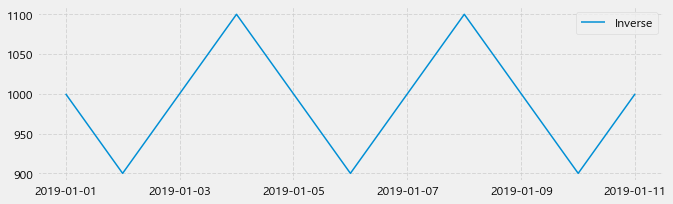

In [6]:
v = fs.Visualize()
v.price_view(df, base_date, cd, (10,3))
# price_view(데이터프레임, 기준일자, 종목코드, (사이즈)) - 그래프 그리기

# 백테스팅 기능 구현 및 실행

트레이딩 로직의 기본 개념

In [7]:
for i in df.index:    # 데이터프레임을 일자별로 순환
    price = df.loc[i, cd]    # 원하는 종목의 가격 읽어오기
    if price < 1000:    # 매수조건
        print(i, 'buy')
    elif price > 1000:    # 매도조건
        print(i, 'sell')

2019-01-02 00:00:00 buy
2019-01-04 00:00:00 sell
2019-01-06 00:00:00 buy
2019-01-08 00:00:00 sell
2019-01-10 00:00:00 buy


트레이딩 북 생성

In [8]:
book = pd.DataFrame()
book[cd] = df[cd]
book['t '+cd] = ''
book['p '+cd] = ''
book

,Inverse,t Inverse,p Inverse
Date,,,
2019-01-01,1000,,
2019-01-02,900,,
2019-01-03,1000,,
2019-01-04,1100,,
2019-01-05,1000,,
2019-01-06,900,,
2019-01-07,1000,,
2019-01-08,1100,,
2019-01-09,1000,,


In [9]:
def create_trade_book(sample, cd):
    book = pd.DataFrame()
    book[cd] = sample[cd]
    book['t '+cd] = ''
    book['p '+cd] = ''
    return(book)

In [10]:
book = create_trade_book(df, cd)
book

,Inverse,t Inverse,p Inverse
Date,,,
2019-01-01,1000,,
2019-01-02,900,,
2019-01-03,1000,,
2019-01-04,1100,,
2019-01-05,1000,,
2019-01-06,900,,
2019-01-07,1000,,
2019-01-08,1100,,
2019-01-09,1000,,


In [11]:
trd = fs.Trade()

In [12]:
trd.create_trade_book(df, cd)
# create_trade_book(데이터프레임, 종목코드) - 시세판을 읽어 트레이드북 생성

,Inverse,t Inverse,p Inverse
Date,,,
2019-01-01,1000,,
2019-01-02,900,,
2019-01-03,1000,,
2019-01-04,1100,,
2019-01-05,1000,,
2019-01-06,900,,
2019-01-07,1000,,
2019-01-08,1100,,
2019-01-09,1000,,


트레이딩 결과 산출 및 트레이딩북에 기록 

In [13]:
def trade(df, book, cd, buy, sell):
    for i in df.index:
        price = df.loc[i, cd]
        if price < buy:    # 가격이 매수기준 미만이면
            book.loc[i, 't '+cd] = 'buy'    # 매수 기록
        elif price > sell:    # 가격이 매도기준 초과이면
            book.loc[i, 't '+cd] = ''    # 포지션 청산 기록
        else:    # 가격이 매도, 매수구간 사이라면
            if book.shift(1).loc[i, 't '+cd] == 'buy':    # 이미 매수상태이면
                book.loc[i, 't '+cd] = 'buy'    # 매수상태 유지 기록

In [14]:
trade(df, book, cd, 1000, 1000)
book

,Inverse,t Inverse,p Inverse
Date,,,
2019-01-01,1000,,
2019-01-02,900,buy,
2019-01-03,1000,buy,
2019-01-04,1100,,
2019-01-05,1000,,
2019-01-06,900,buy,
2019-01-07,1000,buy,
2019-01-08,1100,,
2019-01-09,1000,,


In [15]:
trd.position(book, cd)
# posion(트레이드북, 종목코드) - 포지션 산출

,Inverse,t Inverse,p Inverse
Date,,,
2019-01-01,1000,,zz
2019-01-02,900,buy,zl
2019-01-03,1000,buy,ll
2019-01-04,1100,,lz
2019-01-05,1000,,zz
2019-01-06,900,buy,zl
2019-01-07,1000,buy,ll
2019-01-08,1100,,lz
2019-01-09,1000,,zz


수익률 산출 기능 구현 및 실행

In [16]:
buy, sell, rtn = 0, 0, 1.0
for i in book.index:
    if book.loc[i, 'p '+cd] == 'zl':    # 매수 진입 시
        buy = book.loc[i, cd]    # 매수가 기록
        print('매수 @', buy)
    elif book.loc[i, 'p '+cd] == 'lz':    # 매도 진입 시
        sell = book.loc[i, cd]    # 매도가 기록
        earning = sell - buy    # 손익 계산
        earning_ratio = earning / buy * 100    # 수익률 계산
        print('매도 @', sell, '| 손익:', earning, '| 수익률:', round(earning_ratio, 1), '%')

매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 22.2 %
매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 22.2 %
매수 @ 900


In [17]:
buy, sell = 0, 0
rtn = 1.0
book['return'] = 1
for i in book.index:
    if book.loc[i, 'p '+cd] == 'zl':    # 매수 진입 시
        buy = book.loc[i, cd]    # 매수가 기록
        print('매수 @', buy)
    elif book.loc[i, 'p '+cd] == 'lz':    # 매도 진입 시
        sell = book.loc[i, cd]    # 매도가 기록
        earning = sell - buy    # 손익 계산
        earning_ratio = earning / buy * 100    # 수익률 계산
        rtn = (sell - buy) / buy + 1    # 손익 계산
        print('매도 @', sell, '| 손익:', earning, '| 수익률:', round(earning_ratio, 1), '%')
        book.loc[i, 'return'] = round(rtn, 4)
        
acc_rtn = 1.0
for i in book.index:
    rtn = book.loc[i, 'return']
    acc_rtn = acc_rtn * rtn
    book.loc[i, 'acc return'] = acc_rtn

print ('Accunulated return :', round((acc_rtn - 1) * 100, 2), '%')

매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 22.2 %
매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 22.2 %
매수 @ 900
Accunulated return : 49.38 %


In [18]:
book

,Inverse,t Inverse,p Inverse,return,acc return
Date,,,,,
2019-01-01,1000,,zz,1.0000,1.000000
2019-01-02,900,buy,zl,1.0000,1.000000
2019-01-03,1000,buy,ll,1.0000,1.000000
2019-01-04,1100,,lz,1.2222,1.222200
2019-01-05,1000,,zz,1.0000,1.222200
2019-01-06,900,buy,zl,1.0000,1.222200
2019-01-07,1000,buy,ll,1.0000,1.222200
2019-01-08,1100,,lz,1.2222,1.493773
2019-01-09,1000,,zz,1.0000,1.493773


In [22]:
trd.returns(book, cd, display=True)
# returns(트레이드북, 종목코드) - 수익률 계산

2019-01-02 00:00:00 long Inverse 900
2019-01-04 00:00:00 long Inverse 900  | unwind long Inverse 1100  | return: 1.2222
2019-01-06 00:00:00 long Inverse 900
2019-01-08 00:00:00 long Inverse 900  | unwind long Inverse 1100  | return: 1.2222
2019-01-10 00:00:00 long Inverse 900
Accumulated return: 49.38 %  ( # of trade: 2  , # of win: 2  )
Avg return: 0.2222 , Prob. of win: 1.0


1.4938

In [20]:
help(trd.returns)

Help on method returns in module finterstellar.trading:

returns(book, s_cd, display=False, report_name='', report={}) method of finterstellar.trading.Trade instance



In [23]:
book

,Inverse,t Inverse,p Inverse,return,acc return
Date,,,,,
2019-01-01,1000,,zz,1.000000,1.000000
2019-01-02,900,buy,zl,1.000000,1.000000
2019-01-03,1000,buy,ll,1.000000,1.000000
2019-01-04,1100,,lz,1.222222,1.222222
2019-01-05,1000,,zz,1.000000,1.222222
2019-01-06,900,buy,zl,1.000000,1.222222
2019-01-07,1000,buy,ll,1.000000,1.222222
2019-01-08,1100,,lz,1.222222,1.493827
2019-01-09,1000,,zz,1.000000,1.493827


로그수익률 산출 기능 구현 및 실행

In [24]:
buy, sell = 0, 0
for i in book.index:
    if book.loc[i, 'p '+cd] == 'zl':    # 매수 진입 시
        buy = book.loc[i, cd]    # 매수가 기록
        print('매수 @', buy)
    elif book.loc[i, 'p '+cd] == 'lz':    # 매도 진입 시
        sell = book.loc[i, cd]    # 매도가 기록
        earning = sell - buy    # 손익 계산
        earning_ratio = np.log(sell/buy) * 100    # 수익률 계산
        print('매도 @', sell, '| 손익:', earning, '| 수익률:', round(earning_ratio, 1), '%')

매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 20.1 %
매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 20.1 %
매수 @ 900


In [25]:
buy, sell = 0, 0
rtn = 0.0
book['return'] = 0.0
for i in book.index:
    if book.loc[i, 'p '+cd] == 'zl':    # 매수 진입 시
        buy = book.loc[i, cd]    # 매수가 기록
        print('매수 @', buy)
    elif book.loc[i, 'p '+cd] == 'lz':    # 매도 진입 시
        sell = book.loc[i, cd]    # 매도가 기록
        earning = sell - buy    # 손익 계산
        earning_ratio = np.log(sell/buy) * 100    # 수익률 계산
        print('매도 @', sell, '| 손익:', earning, '| 수익률:', round(earning_ratio, 1), '%')
        book.loc[i, 'return'] = earning_ratio
        
acc_rtn = 0.0
for i in book.index:
    rtn = book.loc[i, 'return']
    acc_rtn = acc_rtn + rtn
    book.loc[i, 'acc return'] = acc_rtn
print ('Accunulated return :', round(acc_rtn, 2), '%')

매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 20.1 %
매수 @ 900
매도 @ 1100 | 손익: 200 | 수익률: 20.1 %
매수 @ 900
Accunulated return : 40.13 %


In [26]:
trd.returns_log(book, cd)
# returns(트레이드북, 종목코드) - 수익률 계산

Accunulated return : 40.13 %


40.1341